<a href="https://colab.research.google.com/github/Priyam8210/CyberLab/blob/main/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format ='retina'
sns.set(style='ticks')

plt.rc('figure', figsize=(6, 3.7), dpi=100) # figure size
plt.rc('axes', labelpad=20, facecolor="#ffffff", # properties of axes
       linewidth=0.4, grid=True, labelsize=10)
plt.rc('xtick.major', width=0.2) # major ticks where the labels are shown
plt.rc('ytick.major', width=0.2) # minor ticks where the labels are not shown
plt.rc('grid', color='#EEEEEE', linewidth=0.25)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Z_analytic_vidhya/data/train_loan prediction.csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.describe(include=[np.number]).transpose()

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [ ]:
df.describe(include=[np.object]).transpose()

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [ ]:
df = df.drop('Loan_ID', axis =1)

In [ ]:
len(df)

614

In [ ]:
df[['Gender', 'ApplicantIncome']].groupby(['Gender']).agg(['mean', 'count', 'max', 'median'])

ApplicantIncome                     
                  mean count    max  median
Gender                                     
Female     4643.473214   112  19484  3583.0
Male       5446.460123   489  81000  3865.0

In [ ]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1, 'N':0})

In [ ]:
 df[['Gender', 'Married', 'Loan_Status']].groupby(['Gender', 'Married']).agg(['count', 'mean'])

Loan_Status          
                     count      mean
Gender Married                      
Female No               80  0.637500
       Yes              31  0.741935
Male   No              130  0.623077
       Yes             357  0.717087

In [ ]:
df[['Property_Area', 'Loan_Status']].groupby(['Property_Area']).agg(['mean', 'count'])

Loan_Status      
                     mean count
Property_Area                  
Rural            0.614525   179
Semiurban        0.768240   233
Urban            0.658416   202

In [ ]:
df[['Education', 'Loan_Status']].groupby(['Education']).agg(['mean', 'count'])

Loan_Status      
                    mean count
Education                     
Graduate        0.708333   480
Not Graduate    0.611940   134

In [ ]:
df[['Education', 'Gender', 'Loan_Status']].groupby(['Education', 'Gender']).agg(['mean', 'count'])

Loan_Status      
                           mean count
Education    Gender                  
Graduate     Female    0.663043    92
             Male      0.720745   376
Not Graduate Female    0.700000    20
             Male      0.601770   113

In [ ]:
df[['Gender','Dependents', 'Self_Employed', 'Loan_Status']].groupby(['Gender','Dependents', 'Self_Employed']).agg(['mean', 'count'])

Loan_Status      
                                       mean count
Gender Dependents Self_Employed                  
Female 0          No               0.686567    67
                  Yes              0.600000    10
       1          No               0.666667    12
                  Yes              0.600000     5
       2          No               0.600000     5
       3+         No               0.500000     2
Male   0          No               0.686636   217
                  Yes              0.760000    25
       1          No               0.687500    64
                  Yes              0.428571    14
       2          No               0.794521    73
                  Yes              0.687500    16
       3+         No               0.578947    38
                  Yes              1.000000     6

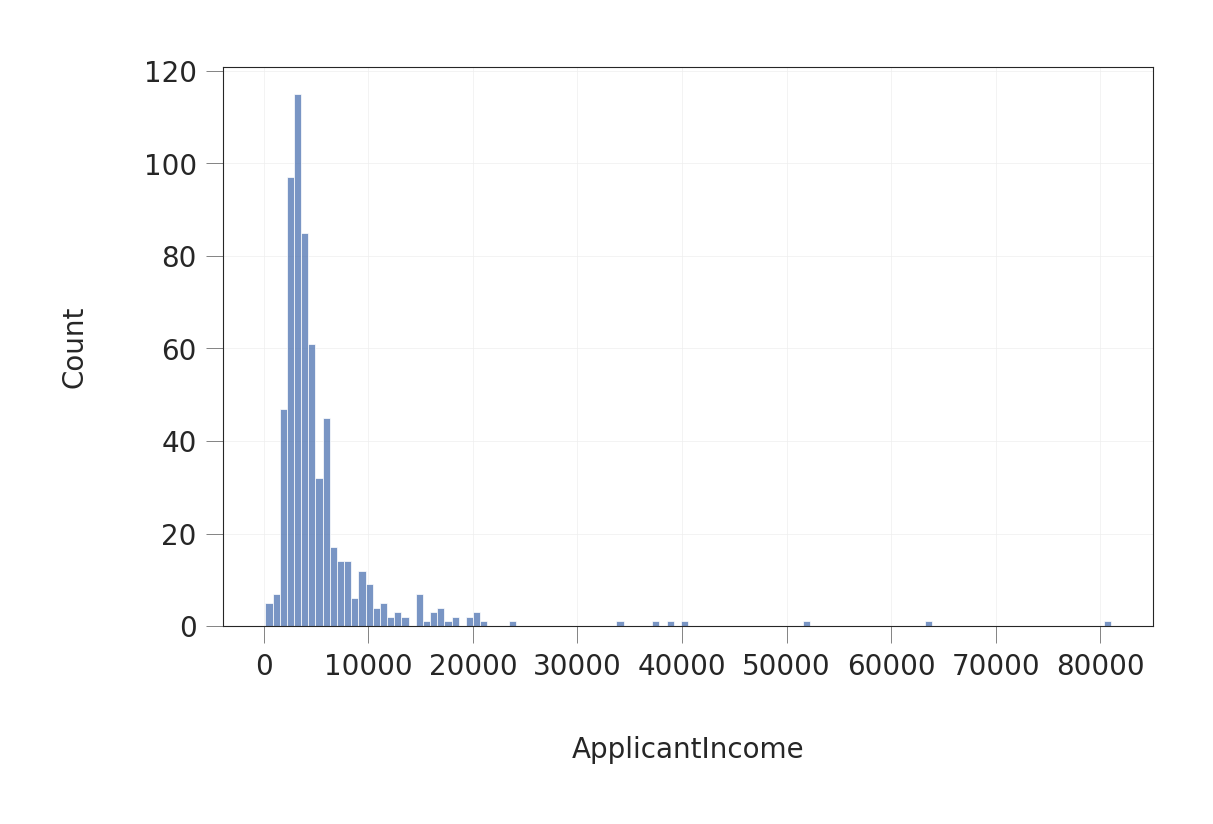

In [ ]:
sns.histplot(df['ApplicantIncome'] )

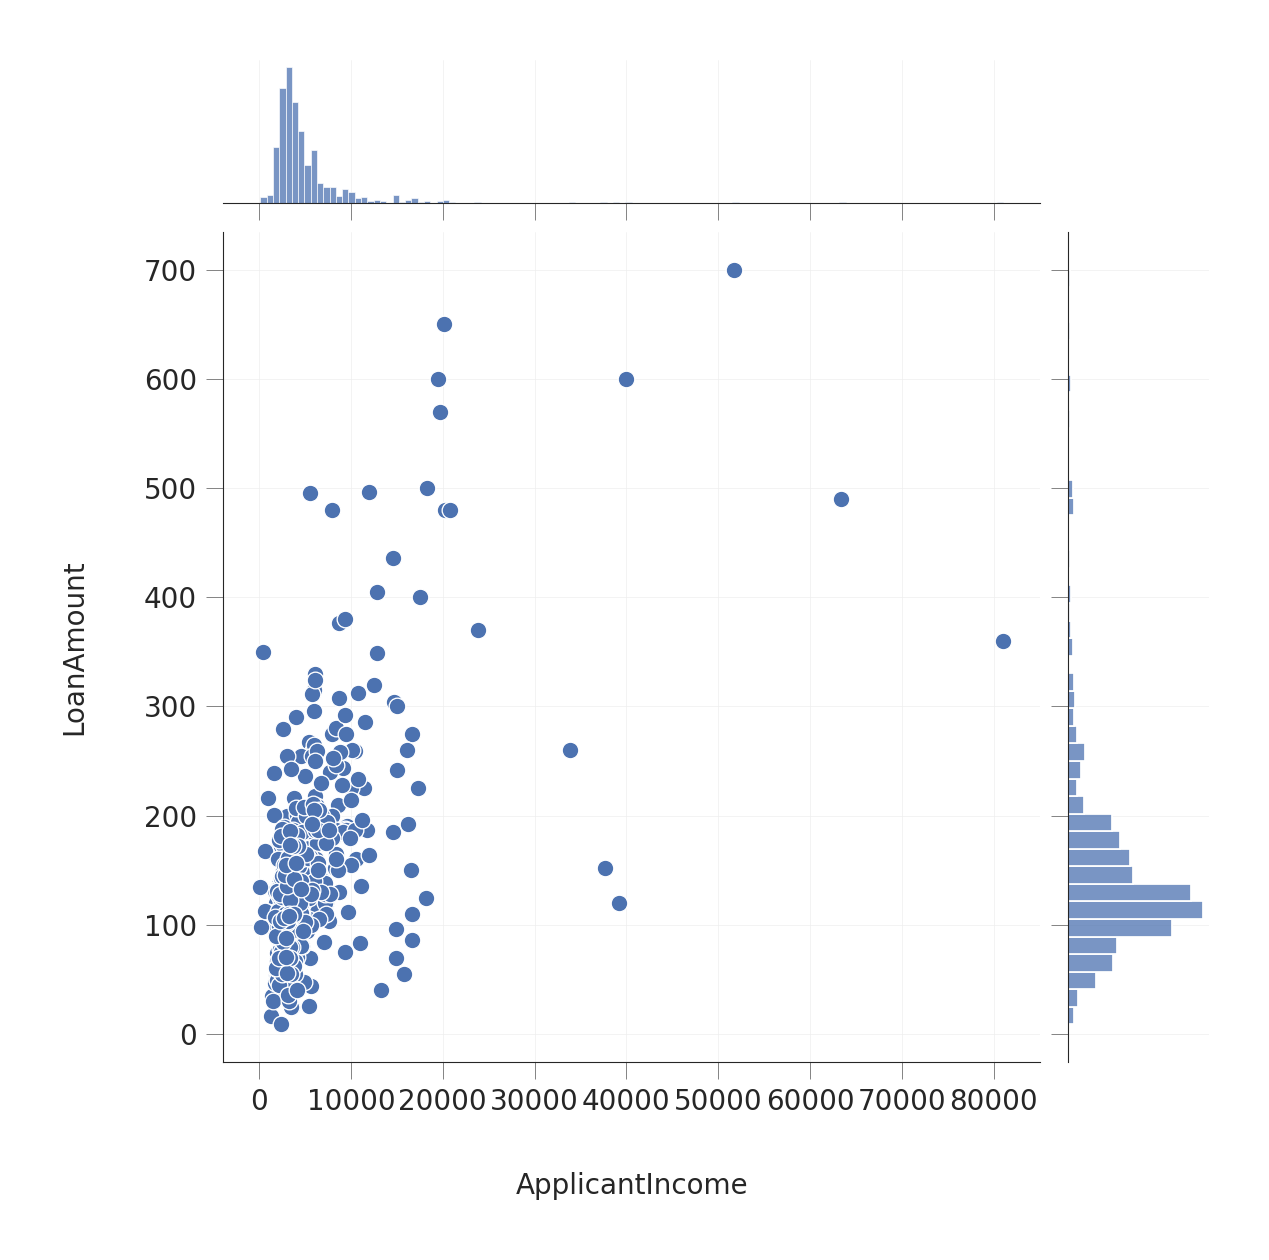

In [ ]:
sns.jointplot('ApplicantIncome', 'LoanAmount', data = df)

(Text(0.5, 0, 'LoanAmount'), Text(0, 0.5, 'Loan_Amount_Term'))

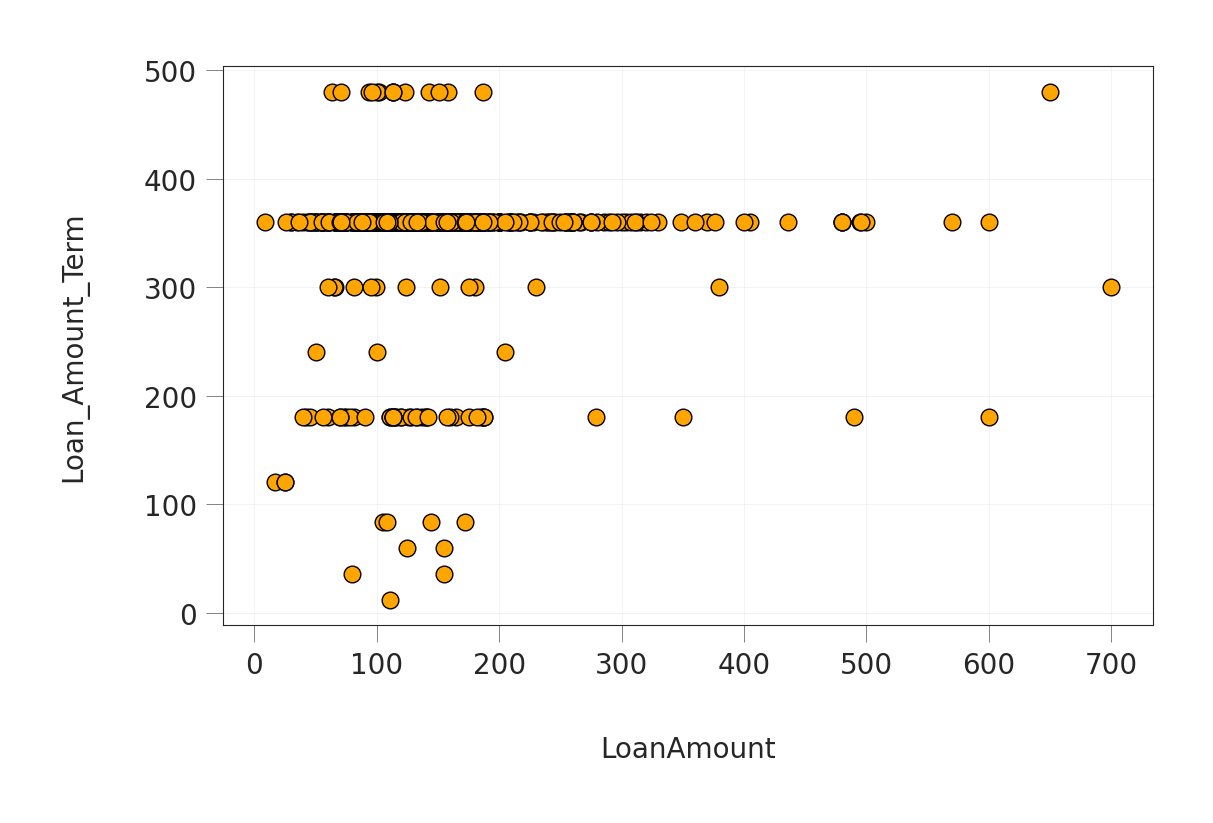

In [ ]:
plt.scatter(x=df['LoanAmount'], y=df['Loan_Amount_Term'], edgecolors='black', color = 'orange', linewidths=.5)
plt.xlabel("LoanAmount"), plt.ylabel("Loan_Amount_Term")

In [ ]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df['Gender'].fillna('Male', inplace=True)

In [ ]:
df['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df['Married'].fillna('UnKn', inplace=True)

In [ ]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
rand_val = df['Dependents'].dropna().sample(df['Dependents'].isnull().sum(), random_state=3)
rand_val.index = df[df['Dependents'].isnull()].index
df.loc[df['Dependents'].isnull(), 'new_feat'] = rand_val


In [ ]:
for i, data in enumerate(df.Dependents):
  if pd.isnull(data):
    df.Dependents[i]= df.new_feat[i]

In [ ]:
df = df.drop('new_feat', axis =1)

In [ ]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
df['Self_Employed'].fillna('No', inplace=True)

In [ ]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [ ]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

In [ ]:
df['Credit_History'].fillna(1, inplace=True)

In [ ]:
num_col = list(df.select_dtypes(include='number'))

In [ ]:
for col in num_col:
  print(col, '::', df[col].skew())

ApplicantIncome :: 6.539513113994625
CoapplicantIncome :: 7.491531216657306
LoanAmount :: 2.743052748820892
Loan_Amount_Term :: -2.4021122563890396
Credit_History :: -2.0219705924848985
Loan_Status :: -0.8099980938586473


In [ ]:
df['ApplicantIncome'] = np.sqrt(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.sqrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.sqrt(df['LoanAmount'])
#df['Loan_Amount_Term'] = np.log(df['Loan_Amount_Term'])


In [ ]:
for col in num_col:
  print(col, '::', df[col].skew())

ApplicantIncome :: 2.9672860248621027
CoapplicantIncome :: 0.9795605436152078
LoanAmount :: 1.3422693138757835
Loan_Amount_Term :: -2.4021122563890396
Credit_History :: -2.0219705924848985
Loan_Status :: -0.8099980938586473


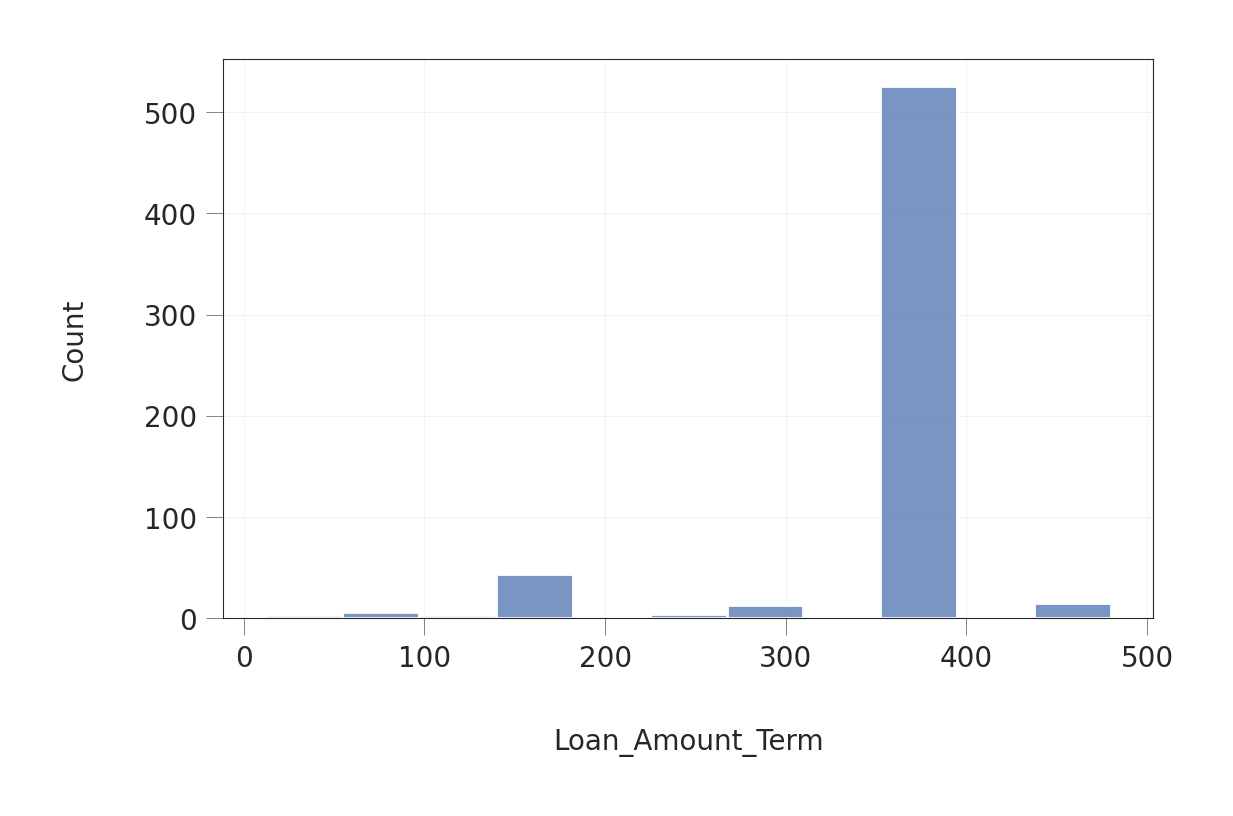

In [ ]:
sns.histplot(df['Loan_Amount_Term'])

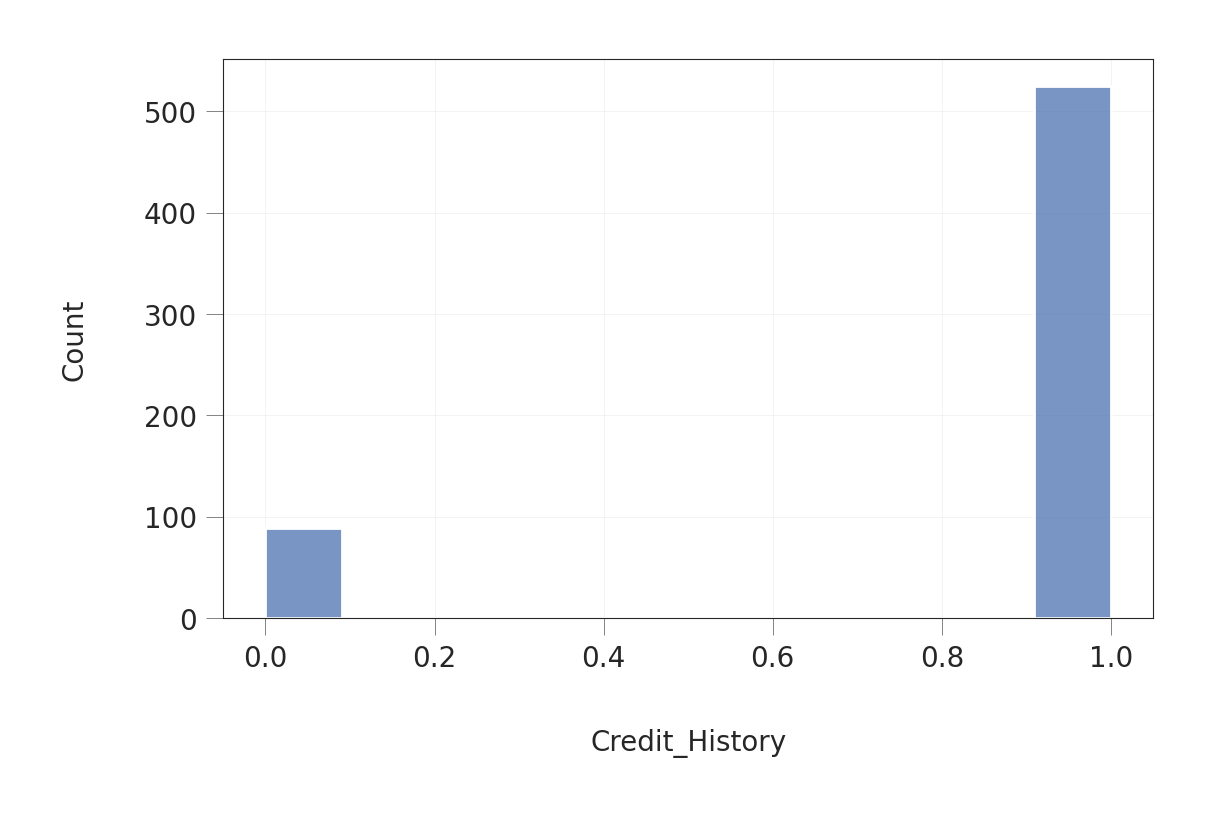

In [ ]:
sns.histplot(df['Credit_History'])

In [ ]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,11.313708,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,1


In [ ]:
df['Property_Area'] = df['Property_Area'].map({'Semiurban':3, 'Urban':2, 'Rural':1})

In [ ]:
df['Self_Employed']= df['Self_Employed'].map({'Yes':0, 'No':1})

In [ ]:
df['Education'] = df['Education'].map({'Graduate':1, 'Not Graduate':0})

In [ ]:
df['Married'] = df['Married'].map({'Yes':2, 'No':2, 'UnKn':0})

In [ ]:
df = pd.get_dummies(df)

In [ ]:
df.head()

,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
0,2,1,1,76.478755,0.000000,11.313708,360.0,1.0,2,1,0,1,1,0,0,0
1,2,1,1,67.697858,38.832976,11.313708,360.0,1.0,1,0,0,1,0,1,0,0
2,2,1,0,54.772256,0.000000,8.124038,360.0,1.0,2,1,0,1,1,0,0,0
3,2,0,1,50.823223,48.559242,10.954451,360.0,1.0,2,1,0,1,1,0,0,0
4,2,1,1,77.459667,0.000000,11.874342,360.0,1.0,2,1,0,1,1,0,0,0


In [ ]:
from scipy import stats
for col in num_col:
  print(pd.Series(stats.zscore(df[col])))

0      0.299200
1     -0.029996
2     -0.514577
3     -0.662626
4      0.335975
         ...   
609   -0.549090
610   -0.165701
611    0.800275
612    0.696657
613   -0.029996
Name: ApplicantIncome, Length: 614, dtype: float64
0     -0.968111
1      0.374245
2     -0.968111
3      0.710457
4     -0.968111
         ...   
609   -0.968111
610   -0.968111
611   -0.432594
612   -0.968111
613   -0.968111
Name: CoapplicantIncome, Length: 614, dtype: float64
0     -0.127640
1     -0.127640
2     -1.193185
3     -0.247654
4      0.059646
         ...   
609   -1.092261
610   -1.794322
611    1.406457
612    0.661107
613   -0.054530
Name: LoanAmount, Length: 614, dtype: float64
0      0.273231
1      0.273231
2      0.273231
3      0.273231
4      0.273231
         ...   
609    0.273231
610   -2.522836
611    0.273231
612    0.273231
613    0.273231
Name: Loan_Amount_Term, Length: 614, dtype: float64
0      0.411733
1      0.411733
2      0.411733
3      0.411733
4      0.411733
         ...  

In [ ]:
df.isnull().sum()

Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
Gender_Female        0
Gender_Male          0
Dependents_0         0
Dependents_1         0
Dependents_2         0
Dependents_3+        0
dtype: int64

In [ ]:
#from sklearn.model_selection import train_test_split
#x_train, x_val, y_train , y_val = train_test_split(df.drop('Loan_Status', axis=1), df['Loan_Status'], test_size = .1, random_state =3)

In [ ]:
x_train = df.drop('Loan_Status', axis = 1)
y_train = df['Loan_Status']

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
para ={"n_estimators":range(1, 100), "max_depth":range(1, 20), "max_features":range(1, 12)}
clf = RandomizedSearchCV(RandomForestClassifier(random_state=2022), para, cv = 10, n_jobs =-1, n_iter= 20, random_state=2022  )
clf.fit(x_train, y_train)
print(clf.best_params_)

{'n_estimators': 87, 'max_features': 10, 'max_depth': 2}


In [ ]:
model = RandomForestClassifier(**clf.best_params_, oob_score=True)
model.fit(x_train, y_train)
model.oob_score_

0.8078175895765473